Estimate the free energy of the following reaction at standard pressure and 500 K:

$$H_2(g) + (1/2)O_2(g) \rightarrow H_2O(g) $$

In [3]:
so_H2_kJperKperKmol = 130.6
cp_H2_kJperKperKmol = 29.1
gf_H2_gas_kJperKmol = 0

so_O2_kJperKperKmol = 205
cp_O2_kJperKperKmol = 29.1
gf_O2_gas_kJperKmol = 0

so_H2O_kJperKperKmol = 188.7
cp_H2O_kJperKperKmol = 37.4
gf_H2O_gas_kJperKmol = -228590

In [4]:
nH2_r_kmol = 1
nO2_r_kmol = 0.5
nH2O_p_kmol = 1

The free energy is:

$$ g = h - T s$$

For an isobaric process, we can write:

$$ ds = \frac{\delta q}{T} = c_p\frac{dT}{T} $$

Integrating yields:

$$s = s^\circ + \int_{T_0}^{T} c_p \frac{dT}{T} $$

The change in free energy going from $g_0$ to $g$ is:

$$g - g^\circ = (h - h^\circ) - (Ts - T_0 s^\circ) $$

Recalling the definition of enthalpy:

$$dh = c_p dT $$

We can write the above as:

$$g - g^\circ = \int_{T_0}^T c_p dT - \left(T \left(s^\circ + \int_{T_0}^{T} c_p \frac{dT}{T}\right) - T_0 s^\circ \right) $$

$$g - g^\circ = \int_{T_0}^T c_p dT - \left(s^\circ (T - T_0) + T \int_{T_0}^{T} c_p \frac{dT}{T}  \right) $$

If we assume that $c_p$ is constant (probably valid for a few hundred degrees difference), we can write:

$$ \bar{g} = \bar{g}_f^\circ + (c_p - \bar{s}^\circ)(T_1 - T_0) - T c_p \ln \frac{T_1}{T_0} $$

The change in Gibbs free energy of the reaction is:

$$ \Delta \bar{g} = \bar{g}_\text{H2O} - \bar{g}_\text{H2} - \frac{1}{2}\bar{g}_\text{O2}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'dG (kJ/kmol H2)')

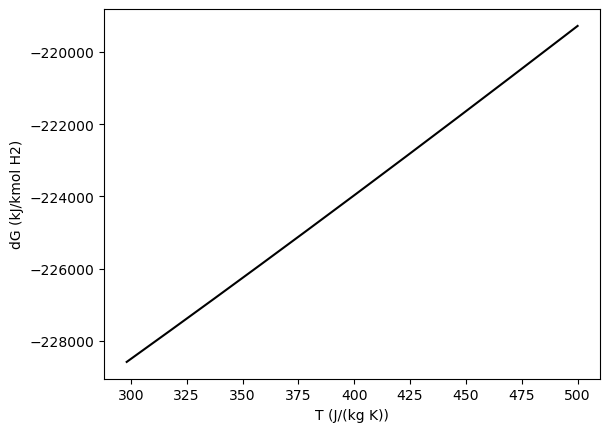

In [12]:
T0_K = 298.15
T1_K = 500

T = np.linspace(T0_K, T1_K, 500) # range of temperatures

#G_H2O_kJperKmolH2 = [nH2O_p_kmol*(gf_H2O_gas_kJperKmol + (cp_H2O_kJperKperKmol - so_H2O_kJperKperKmol)*(t - T0_K) - t*cp_H2O_kJperKperKmol*np.log(t/T0_K)) for t in T]
#G_H2_kJperKmolH2 = [nH2_r_kmol*(gf_H2_gas_kJperKmol + (cp_H2_kJperKperKmol - so_H2_kJperKperKmol)*(t - T0_K) - t*cp_H2_kJperKperKmol*np.log(t/T0_K)) for t in T]
#G_O2_kJperKmolH2 = [nO2_r_kmol*(gf_O2_gas_kJperKmol + (cp_O2_kJperKperKmol - so_O2_kJperKperKmol)*(t - T0_K) - t*cp_O2_kJperKperKmol*np.log(t/T0_K)) for t in T]

dG_kJperKmolH2 = [(nH2O_p_kmol*(gf_H2O_gas_kJperKmol + (cp_H2O_kJperKperKmol - so_H2O_kJperKperKmol)*(t - T0_K) - t*cp_H2O_kJperKperKmol*np.log(t/T0_K))) - ((nH2_r_kmol*(gf_H2_gas_kJperKmol + (cp_H2_kJperKperKmol - so_H2_kJperKperKmol)*(t - T0_K) - t*cp_H2_kJperKperKmol*np.log(t/T0_K))) + (nO2_r_kmol*(gf_O2_gas_kJperKmol + (cp_O2_kJperKperKmol - so_O2_kJperKperKmol)*(t - T0_K) - t*cp_O2_kJperKperKmol*np.log(t/T0_K)))) for t in T]

plt.plot(T, dG_kJperKmolH2, 'k-')

plt.xlabel('T (J/(kg K))')
plt.ylabel('dG (kJ/kmol H2)')